# <font color="red">Linear Regression</font> V/s <font color="red">Support Vector Regression Regression</font> 


In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Importing Data

In [2]:
import pandas as pd
from sklearn import preprocessing
bos = pd.DataFrame(boston.data)
print("the raw data from BOSTON DATA SET :")
print(bos.head())
print('**=='*25)


the raw data from BOSTON DATA SET :
         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==**==


In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

### Data standardization :<a href="https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc">"why to standardize data"</a>

In [6]:
# Get column names first
names = bos.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(bos)
BOS = pd.DataFrame(scaled_df, columns=names)
print("the data after standardization is : ")
print("--"*50)
print(BOS.head(),'\n')
print("-+"*50)

the data after standardization is : 
----------------------------------------------------------------------------------------------------
          0         1         2         3         4         5         6  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

          7         8         9        10        11        12  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501   

-+-+-+-+-+-+-+-+-+-+-+-+-

In [7]:
BOS['PRICE'] = boston.target
X = BOS.drop('PRICE', axis = 1)
Y = BOS['PRICE']
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size = 0.33, random_state = 5)
print('the train data is of dimension')
print(X_train.shape,Y_train.shape)
print('the test data is of dimension')
print(X_test.shape,Y_test.shape)
print()


the train data is of dimension
(339, 13) (339,)
the test data is of dimension
(167, 13) (167,)



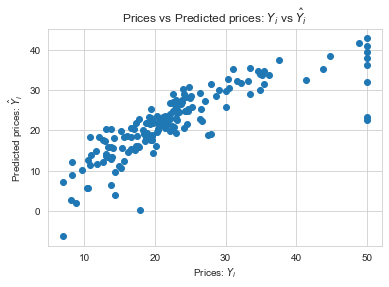

In [20]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

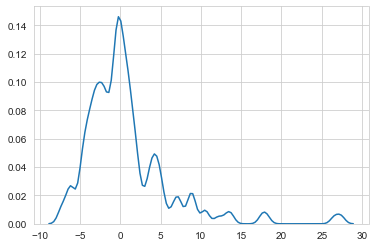

In [10]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


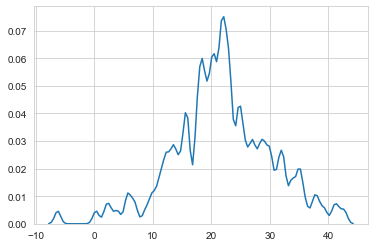

In [11]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MAE_LR=mean_absolute_error(Y_test,Y_pred)
MSE_LR=mean_squared_error(Y_test,Y_pred)
r2_LR=r2_score(Y_test,Y_pred)
print('the mean abs error is :   ', MAE_LR)
print('the mean squared error is :   ',MSE_LR)
print('the goodness of fit is :   ',r2_LR)

the mean abs error is :    3.4550349322483522
the mean squared error is :    28.530458765974625
the goodness of fit is :    0.6956551656111603


In [13]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

model=SVR()
parameters = {'C':[0.0001, 0.001, 0.01, 0.1,1,10,100,1000,10000],'epsilon':[0.01,0.1,1,10]}
clf=GridSearchCV(model,parameters,cv=3, scoring='r2',return_train_score=True,n_jobs=-1)
clf.fit(X_train,Y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'epsilon': [0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [14]:
clf.best_estimator_


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.015659,0.003300,0.006335,9.456821e-04,0.0001,0.01,"{'C': 0.0001, 'epsilon': 0.01}",-0.003223,-0.061736,-0.009756,-0.024905,0.026180,35,-0.011338,-0.015676,-0.031249,-0.019421,0.008549
1,0.015333,0.004095,0.004997,8.167295e-04,0.0001,0.1,"{'C': 0.0001, 'epsilon': 0.1}",-0.002676,-0.061753,-0.008782,-0.024403,0.026527,34,-0.010425,-0.015685,-0.029305,-0.018472,0.007956
2,0.012324,0.002623,0.003331,4.713159e-04,0.0001,1,"{'C': 0.0001, 'epsilon': 1}",-0.004981,-0.064620,-0.007811,-0.025804,0.027471,36,-0.014068,-0.017143,-0.027318,-0.019510,0.005662
3,0.016205,0.002741,0.003862,1.574135e-03,0.0001,10,"{'C': 0.0001, 'epsilon': 10}",-0.015945,-0.001479,-0.016716,-0.011380,0.007008,30,-0.003361,-0.006370,-0.006077,-0.005270,0.001355
4,0.019825,0.002383,0.005666,1.246088e-03,0.001,0.01,"{'C': 0.001, 'epsilon': 0.01}",-0.000785,-0.060103,-0.007215,-0.022701,0.026577,32,-0.008762,-0.013556,-0.028461,-0.016926,0.008388
5,0.018656,0.007588,0.004658,1.695670e-03,0.001,0.1,"{'C': 0.001, 'epsilon': 0.1}",-0.000243,-0.060267,-0.006646,-0.022386,0.026914,31,-0.007868,-0.013639,-0.027330,-0.016279,0.008162
6,0.017990,0.001413,0.005998,3.558054e-03,0.001,1,"{'C': 0.001, 'epsilon': 1}",-0.002667,-0.063351,-0.005619,-0.023879,0.027937,33,-0.011672,-0.015266,-0.025151,-0.017363,0.005699
7,0.012990,0.001401,0.006326,3.400615e-03,0.001,10,"{'C': 0.001, 'epsilon': 10}",-0.015055,-0.000535,-0.016028,-0.010539,0.007085,29,-0.002359,-0.005469,-0.005385,-0.004404,0.001447
8,0.015325,0.001247,0.003998,1.415180e-03,0.01,0.01,"{'C': 0.01, 'epsilon': 0.01}",0.023084,-0.038232,0.017002,0.000618,0.027583,25,0.016690,0.009497,-0.002638,0.007850,0.007976
9,0.016841,0.000614,0.004837,1.023589e-03,0.01,0.1,"{'C': 0.01, 'epsilon': 0.1}",0.022909,-0.038810,0.015843,-0.000019,0.027580,26,0.016337,0.009502,-0.004781,0.007019,0.008798


In [16]:
model=SVR(C= 10, epsilon= 0.1)
model.fit(X_train,Y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
Y_pred_s = model.predict(X_test)

****************************************************************************************************
the metrics for SVR are 
the mean abs error is :    2.638775990141505
the mean squared error is :    23.52418790608938
the goodness of fit is :    0.7490588871655619
****************************************************************************************************


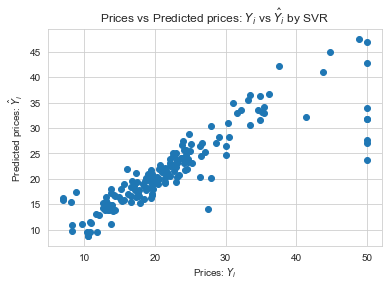

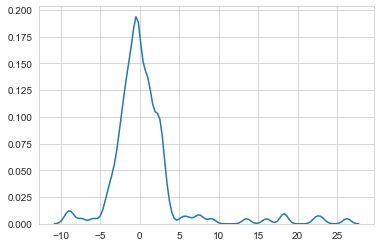

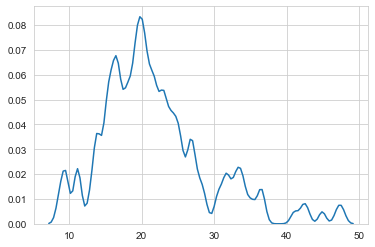

In [22]:
MAE_SVR=mean_absolute_error(Y_test,Y_pred_s)
MSE_SVR=mean_squared_error(Y_test,Y_pred_s)
r2_SVR=r2_score(Y_test,Y_pred_s)

print("*"*100)
print("the metrics for SVR are ")
print('the mean abs error is :   ',  MAE_SVR)
print('the mean squared error is :   ',MSE_SVR)
print('the goodness of fit is :   ',r2_SVR)
print("*"*100)

plt.scatter(Y_test, Y_pred_s)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ by SVR")
plt.show()


delta_y = Y_test - Y_pred_s;

# import seaborn as sns;
# import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred_s), bw=0.5)
plt.show()

## Conclusion

In [23]:
from prettytable import PrettyTable
x = PrettyTable(["Model", "Hyper-parameter tuning", "Hyper-parameter" ,"MSE","MAE","r2 Score"])
x.add_row([ "LR","---", "none", MSE_LR,MAE_LR,r2_LR])
x.add_row(["SVR", "GridSearchCV", {'C': 10, 'epsilon': 0.1},MSE_SVR,MAE_SVR,r2_SVR])
print(x)

+-------+------------------------+---------------------------+--------------------+--------------------+--------------------+
| Model | Hyper-parameter tuning |      Hyper-parameter      |        MSE         |        MAE         |      r2 Score      |
+-------+------------------------+---------------------------+--------------------+--------------------+--------------------+
|   LR  |          ---           |            none           | 28.530458765974625 | 3.4550349322483522 | 0.6956551656111603 |
|  SVR  |      GridSearchCV      | {'C': 10, 'epsilon': 0.1} | 23.52418790608938  | 2.638775990141505  | 0.7490588871655619 |
+-------+------------------------+---------------------------+--------------------+--------------------+--------------------+


<b>SVR is able to perform better than Linear regression</b>. It is very much evident from the reduced error and Goodness of fit for r2 scores.